# Results section analysis of climatic sensitivities

In [193]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True

In [6]:
src = xr.open_dataset("../crmpt12_dx50_nz15_SS_fields_@3ka.nc").squeeze()

# Relative Volume sensitivities

In [216]:
mean_bdot_diff = float(src.relative_volume.isel(offset=[0,-1]).diff("offset").mean("T_ma")) * 100
mean_T_ma_diff = float(src.relative_volume.isel(T_ma=[0,-1]).diff("T_ma").mean("offset")) * 100

s = f"The 1.0 degree variation in $b_dot$ produce an average {mean_bdot_diff:1.2f} % difference in $V'$.\n"\
    f"While the 0.25 m/yr variation in $T_ma$ produce an average {mean_T_ma_diff:1.2f} % difference in $V'$."
print(s)

The 1.0 degree variation in $b_dot$ produce an average 60.47 % difference in $V'$.
While the 0.25 m/yr variation in $T_ma$ produce an average -3.94 % difference in $V'$.


# Thermodynamic Mertic sensitivities

In [214]:
mean_bdot_diff = float(src.percent_temperate.isel(offset=[0,-1]).diff("offset").mean("T_ma"))
mean_T_ma_diff = float(src.percent_temperate.isel(T_ma=[0,-1]).diff("T_ma").mean("offset"))

s = f"The 1.0 degree variation in $b_dot$ produce an average {mean_bdot_diff:1.2f} difference in $V'$.\n"\
    f"While the 0.25 m/yr variation in $T_ma$ produce an average {mean_T_ma_diff:1.2f} difference in $V'$."
print(s)

mean_bdot_diff = float(src.mean_enthalpy.isel(offset=[0,-1]).diff("offset").mean("T_ma"))
mean_T_ma_diff = float(src.mean_enthalpy.isel(T_ma=[0,-1]).diff("T_ma").mean("offset"))

s = f"The 1.0 degree variation in $b_dot$ produce an average {mean_bdot_diff:1.2f} difference in $V'$.\n"\
    f"While the 0.25 m/yr variation in $T_ma$ produce an average {mean_T_ma_diff:1.2f} difference in $V'$."
print(s)

The 1.0 degree variation in $b_dot$ produce an average 11.13 difference in $V'$.
While the 0.25 m/yr variation in $T_ma$ produce an average 5.97 difference in $V'$.
The 1.0 degree variation in $b_dot$ produce an average 1.34 difference in $V'$.
While the 0.25 m/yr variation in $T_ma$ produce an average 1.09 difference in $V'$.


# Steady State Convergence 

In [53]:
vprime = xr.open_dataset("../crmpt12_dx50_nz15_relative_volume.nc")

In [177]:
# calculate the percent difference over the last 500 years of initialization
# to confirm (nearly) all simulations reach a steady state 
percent_diff = vprime.relative_volume.isel(t=[-500, -1]).diff('t').squeeze() * 100
# get a mask of the simulations that didn't converge
mask = np.abs(percent_diff) > 1.0
# get the number of simualtions that did not conveger
N = np.count_nonzero(mask)
#
print(f"{N} simulations did not reach the <1% difference in V' convergence threshold")
print(f"Maximum change in V' for all simulations over the last 500 yr is {float(np.abs(percent_diff).max()):1.2f}")

8 simulations did not reach the <1% difference in V' convergence threshold
Maximum change in V' for all simulations over the last 500 yr is 1.16


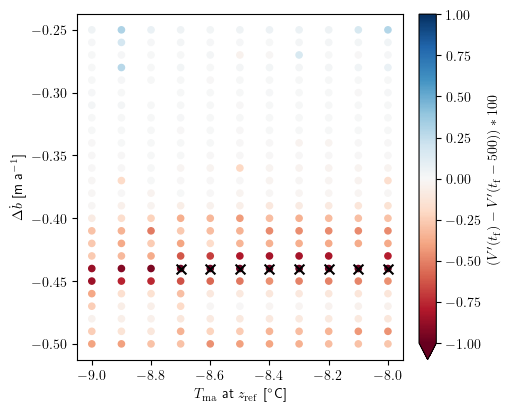

In [212]:
t_grid, b_grid = np.meshgrid(percent_diff.T_ma, percent_diff.offset)

fig, ax = plt.subplots(figsize=(5,4),constrained_layout=True)
im = ax.scatter(t_grid, b_grid, c = percent_diff, cmap="RdBu",
                s=20.0, vmin=-1.0, vmax=1.0)

ax.scatter(t_grid[mask], b_grid[mask], marker="x", color="k", s=50)

ax.set_xlabel('$T_{\\rm ma}$ at $z_{\\rm ref}$  [$^\circ$C]') 
ax.set_ylabel('$\Delta \dot{b}$ [m a$^{-1}$]')

fig.colorbar(im, extend='min', label=r"$ \left(V'(t_{\rm{f}}) -  V'(t_{\rm{f}}-500)\right) * 100$")

Now let's plot the final surface profiles of the simulations that did not converge to corroborate that they lie on retrograde bed slopes. 

Text(0, 0.5, 'Elevation [m a.s.l.]')

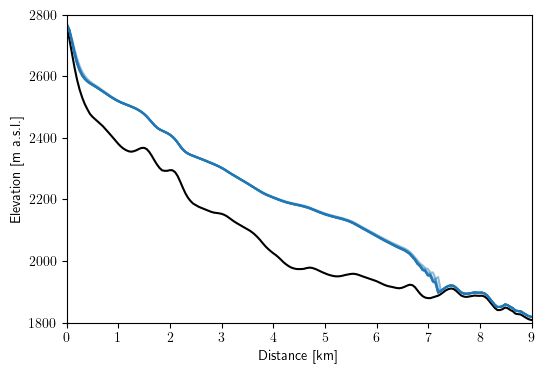

In [201]:
surfaces = xr.open_dataset("../crmpt12_dx50_nz15_Z.nc").isel(t=-1).where(mask, drop=True)

fig, ax = plt.subplots(figsize=(6,4))

bed = surfaces.sel(offset=offset, T_ma=T_ma).isel(coord_2=0)

ax.plot(bed.X[::-1]/1e3, bed.Z, c='k')
for offset in surfaces.offset:
    for T_ma in surfaces.T_ma:
        surface = surfaces.sel(offset=offset, T_ma=T_ma).isel(coord_2=-1)
        ax.plot(surface.X[::-1]/1e3, surface.Z, alpha=0.5, color="tab:blue")

ax.set_xlim(0, 9)
ax.set_ylim(1800, 2800)

ax.set_xlabel('Distance [km]')
ax.set_ylabel('Elevation [m a.s.l.]')